# Circumbinary Planet

Grishma Adenkar SubAnalysis

https://arxiv.org/abs/1308.6328 This analysis of circumbinary systems examined 8 existing circumbinary systems and found that the planetary mass in every system was smaller than Jupiter's mass. In this subanalysis I will take existing circumbinary systems and change the planetary mass to be the size of Jupiter as well as significantly larger and observe how this affects the stability of the system. 

In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from astropy import constants as const
from astropy import units as u

In [101]:
plt.rcParams.update({'font.size': 14, 'text.usetex': True})

In [102]:
def threebodyfunc(vec, t):
    x1, y1, z1 = vec[0], vec[1], vec[2]
    vx1, vy1, vz1 = vec[3], vec[4], vec[5]
    
    x2, y2, z2 = vec[6], vec[7], vec[8]
    vx2, vy2, vz2 = vec[9], vec[10], vec[11]
    
    x3, y3, z3 = vec[12], vec[13], vec[14]
    vx3, vy3, vz3 = vec[15], vec[16], vec[17]
    
    #separation vectors
    dx12, dy12, dz12 = x2-x1, y2-y1, z2-z1
    dx13, dy13, dz13 = x3-x1, y3-y1, z3-z1
    dx23, dy23, dz23 = x3-x2, y3-y2, z3-z2

    d12 = np.sqrt(dx12**2+dy12**2+dz12**2)
    d13 = np.sqrt(dx13**2+dy13**2+dz13**2)
    d23 = np.sqrt(dx23**2+dy23**2+dz23**2)
    
    #acceleration calculations
    ax1 = (G*m2/d12**3)*dx12 + (G*m3/d13**3)*dx13
    ay1 = (G*m2/d12**3)*dy12 + (G*m3/d13**3)*dy13
    az1 = (G*m2/d12**3)*dz12 + (G*m3/d13**3)*dz13
    ax2 = -(G*m1/d12**3)*dx12 + (G*m3/d23**3)*dx23
    ay2 = -(G*m1/d12**3)*dy12 + (G*m3/d23**3)*dy23
    az2 = -(G*m1/d12**3)*dz12 + (G*m3/d23**3)*dz23
    ax3 = -(G*m1/d13**3)*dx13 - (G*m2/d23**3)*dx23
    ay3 = -(G*m1/d13**3)*dy13 - (G*m2/d23**3)*dy23
    az3 = -(G*m1/d13**3)*dz13 - (G*m2/d23**3)*dz23
    
    dvec = np.zeros(len(vec))
    dvec[0], dvec[1], dvec[2] = vx1, vy1, vz1
    dvec[3], dvec[4], dvec[5] = ax1, ay1, az1
    
    dvec[6], dvec[7], dvec[8] = vx2, vy2, vz2
    dvec[9], dvec[10], dvec[11] = ax2, ay2, az2
    dvec[12], dvec[13], dvec[14] = vx3, vy3, vz3
    dvec[15], dvec[16], dvec[17] = ax3, ay3, az3
    
    return dvec

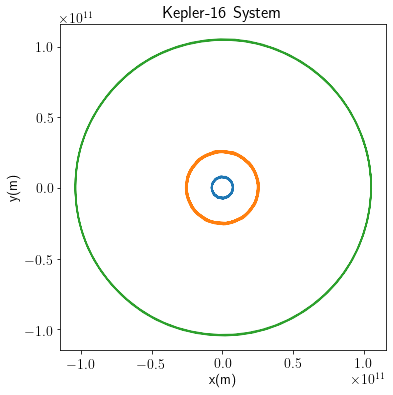

In [103]:
#Kepler-16 System
m1 = (0.6897 * u.Msun).decompose().value
m2 = (0.20255 * u.Msun).decompose().value
m3 = (0.333 * u.Mjup).decompose().value
mu = (m1*m2)/(m1+m2)
G = const.G.value
a = (0.22431 * u.AU).decompose().value
a3 = (0.7048 * u.AU).decompose().value

r1 = -a*(mu/m1)
r2 = a*(mu/m2)
r3 = a3

P = (41.079 * u.day).decompose().value
P3 = (228.776 * u.day).decompose().value

v1 = 2*np.pi*r1/P
v2 = 2*np.pi*r2/P
v3 = 2*np.pi*r3/P3

vect = np.array([r1, 0, 0, 0, v1, 0, r2, 0, 0, 0, v2, 0, r3, 0, 0, 0, v3, 0])
tarr = np.linspace(0,3* P3,200)

ans = integrate.odeint(threebodyfunc, vect, tarr)

x1, y1, z1 = ans[:,0], ans[:,1], ans[:,2]
vx1, vy1, vz1 = ans[:,3], ans[:,4], ans[:,5]

x2, y2, z2 = ans[:,6], ans[:,7], ans[:,8]
vx2, vy2, vz2 = ans[:,9], ans[:,10], ans[:,11]

x3, y3, z3 = ans[:,12], ans[:,13], ans[:,14]
vx3, vy3, vz3 = ans[:,15], ans[:,16], ans[:,17]

plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.title("Kepler-16 System")
plt.xlabel('x(m)')
plt.ylabel('y(m)')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()


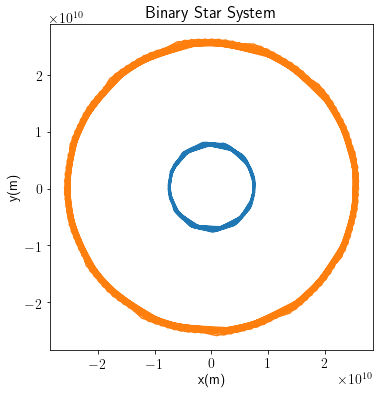

In [104]:
#isolating the orbits of the binary star system
plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title('Binary Star System')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()

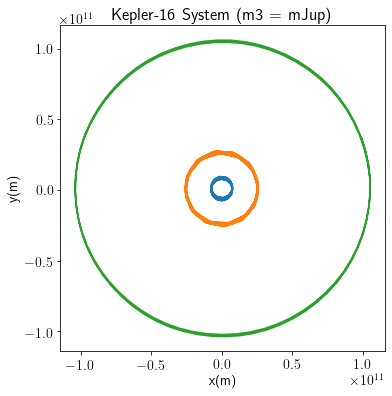

In [105]:
#Mass of planet changed to be the size of jupiter
m1 = (0.6897 * u.Msun).decompose().value
m2 = (0.20255 * u.Msun).decompose().value
m3 = (1 * u.Mjup).decompose().value
mu = (m1*m2)/(m1+m2)
G = const.G.value
a = (0.22431 * u.AU).decompose().value
a3 = (0.7048 * u.AU).decompose().value

r1 = -a*(mu/m1)
r2 = a*(mu/m2)
r3 = a3

P = (41.079 * u.day).decompose().value
P3 = (228.776 * u.day).decompose().value

v1 = 2*np.pi*r1/P
v2 = 2*np.pi*r2/P
v3 = 2*np.pi*r3/P3

vect = np.array([r1, 0, 0, 0, v1, 0, r2, 0, 0, 0, v2, 0, r3, 0, 0, 0, v3, 0])
tarr = np.linspace(0,3*P3,200)

ans = integrate.odeint(threebodyfunc, vect, tarr)

x1, y1, z1 = ans[:,0], ans[:,1], ans[:,2]
vx1, vy1, vz1 = ans[:,3], ans[:,4], ans[:,5]

x2, y2, z2 = ans[:,6], ans[:,7], ans[:,8]
vx2, vy2, vz2 = ans[:,9], ans[:,10], ans[:,11]

x3, y3, z3 = ans[:,12], ans[:,13], ans[:,14]
vx3, vy3, vz3 = ans[:,15], ans[:,16], ans[:,17]

plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.title("Kepler-16 System (m3 = mJup)")
plt.xlabel('x(m)')
plt.ylabel('y(m)')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()


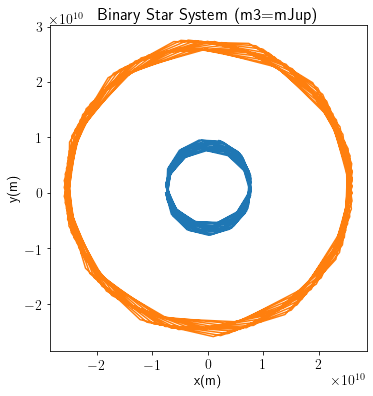

In [106]:
plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title('Binary Star System (m3=mJup)')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()

There is only a slight distortion in the orbits of the binary stars compared to the original system, while the planet's orbit remains about the same. Next I change the planetary mass to be 5 times the mass of Jupiter to better visualize the effects.

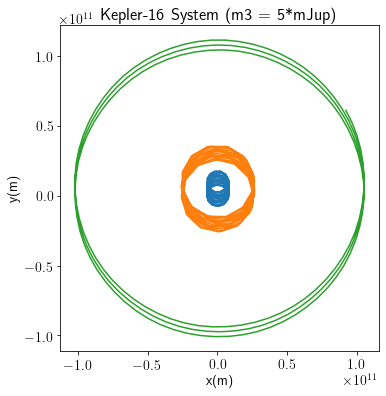

In [107]:
#Mass of planet changed to be 5 times the size of jupiter
m1 = (0.6897 * u.Msun).decompose().value
m2 = (0.20255 * u.Msun).decompose().value
m3 = (5 * u.Mjup).decompose().value
mu = (m1*m2)/(m1+m2)
G = const.G.value
a = (0.22431 * u.AU).decompose().value
a3 = (0.7048 * u.AU).decompose().value

r1 = -a*(mu/m1)
r2 = a*(mu/m2)
r3 = a3

P = (41.079 * u.day).decompose().value
P3 = (228.776 * u.day).decompose().value

v1 = 2*np.pi*r1/P
v2 = 2*np.pi*r2/P
v3 = 2*np.pi*r3/P3

vect = np.array([r1, 0, 0, 0, v1, 0, r2, 0, 0, 0, v2, 0, r3, 0, 0, 0, v3, 0])
tarr = np.linspace(0,3*P3,200)

ans = integrate.odeint(threebodyfunc, vect, tarr)

x1, y1, z1 = ans[:,0], ans[:,1], ans[:,2]
vx1, vy1, vz1 = ans[:,3], ans[:,4], ans[:,5]

x2, y2, z2 = ans[:,6], ans[:,7], ans[:,8]
vx2, vy2, vz2 = ans[:,9], ans[:,10], ans[:,11]

x3, y3, z3 = ans[:,12], ans[:,13], ans[:,14]
vx3, vy3, vz3 = ans[:,15], ans[:,16], ans[:,17]

plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.title("Kepler-16 System (m3 = 5*mJup)")
plt.xlabel('x(m)')
plt.ylabel('y(m)')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()


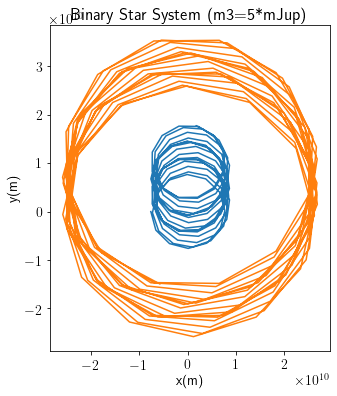

In [108]:
plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title('Binary Star System (m3=5*mJup)')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()

Here we can see a clear distortion on the orbits of the two stars because of the planet's mass being larger, as well as the planet's orbit shifting.  

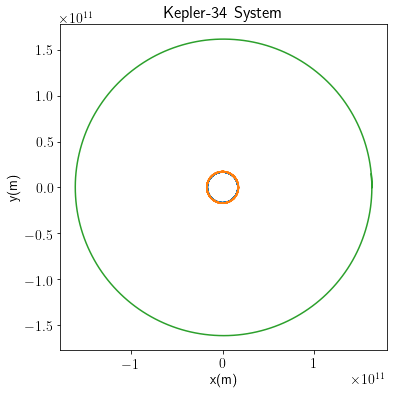

In [109]:
#Kepler-34 System
m1 = (1.0479  * u.Msun).decompose().value
m2 = (1.0208 * u.Msun).decompose().value
m3 = (0.220  * u.Mjup).decompose().value
mu = (m1*m2)/(m1+m2)
G = const.G.value
a = (0.22882 * u.AU).decompose().value
a3 = (1.0896 * u.AU).decompose().value

r1 = -a*(mu/m1)
r2 = a*(mu/m2)
r3 = a3

P = (27.795 * u.day).decompose().value
P3 = (288.822 * u.day).decompose().value

v1 = 2*np.pi*r1/P
v2 = 2*np.pi*r2/P
v3 = 2*np.pi*r3/P3

vect = np.array([r1, 0, 0, 0, v1, 0, r2, 0, 0, 0, v2, 0, r3, 0, 0, 0, v3, 0])
tarr = np.linspace(0,P3,200)

ans = integrate.odeint(threebodyfunc, vect, tarr)

x1, y1, z1 = ans[:,0], ans[:,1], ans[:,2]
vx1, vy1, vz1 = ans[:,3], ans[:,4], ans[:,5]

x2, y2, z2 = ans[:,6], ans[:,7], ans[:,8]
vx2, vy2, vz2 = ans[:,9], ans[:,10], ans[:,11]

x3, y3, z3 = ans[:,12], ans[:,13], ans[:,14]
vx3, vy3, vz3 = ans[:,15], ans[:,16], ans[:,17]

plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.title("Kepler-34 System")
plt.xlabel('x(m)')
plt.ylabel('y(m)')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()


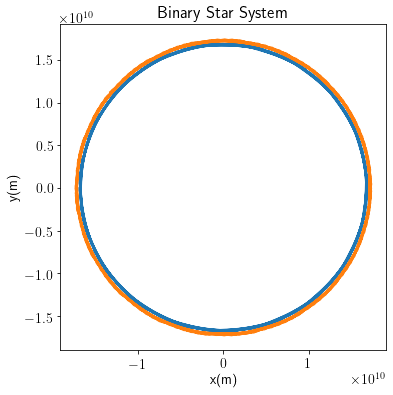

In [110]:
#isolating the orbits of the binary star system
plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title('Binary Star System')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()

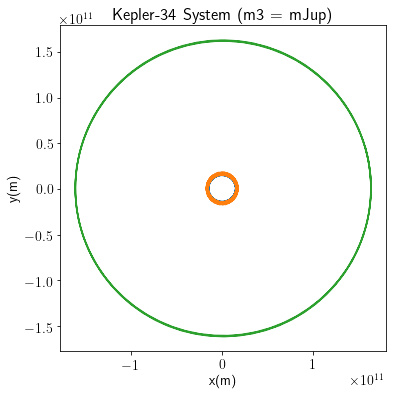

In [111]:
#Kepler-34 System with m3 = mJupiter
m1 = (1.0479  * u.Msun).decompose().value
m2 = (1.0208 * u.Msun).decompose().value
m3 = (1  * u.Mjup).decompose().value
mu = (m1*m2)/(m1+m2)
G = const.G.value
a = (0.22882 * u.AU).decompose().value
a3 = (1.0896 * u.AU).decompose().value

r1 = -a*(mu/m1)
r2 = a*(mu/m2)
r3 = a3

P = (27.795 * u.day).decompose().value
P3 = (288.822 * u.day).decompose().value

v1 = 2*np.pi*r1/P
v2 = 2*np.pi*r2/P
v3 = 2*np.pi*r3/P3

vect = np.array([r1, 0, 0, 0, v1, 0, r2, 0, 0, 0, v2, 0, r3, 0, 0, 0, v3, 0])
tarr = np.linspace(0,3*P3,200)

ans = integrate.odeint(threebodyfunc, vect, tarr)

x1, y1, z1 = ans[:,0], ans[:,1], ans[:,2]
vx1, vy1, vz1 = ans[:,3], ans[:,4], ans[:,5]

x2, y2, z2 = ans[:,6], ans[:,7], ans[:,8]
vx2, vy2, vz2 = ans[:,9], ans[:,10], ans[:,11]

x3, y3, z3 = ans[:,12], ans[:,13], ans[:,14]
vx3, vy3, vz3 = ans[:,15], ans[:,16], ans[:,17]

plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.title("Kepler-34 System (m3 = mJup)")
plt.xlabel('x(m)')
plt.ylabel('y(m)')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()


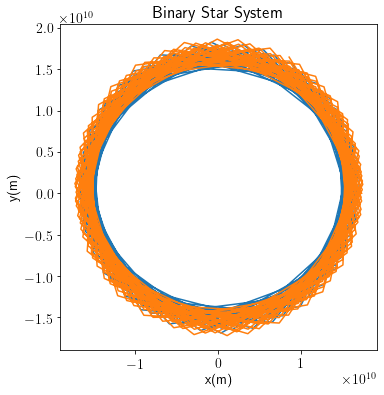

In [112]:
plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title('Binary Star System')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()

There is a clear distortion in the orbits of the binary stars after increasing the planetary mass, while the planet's orbit is fairly similar to the original. I will increase the time to see how the orbit changes. 

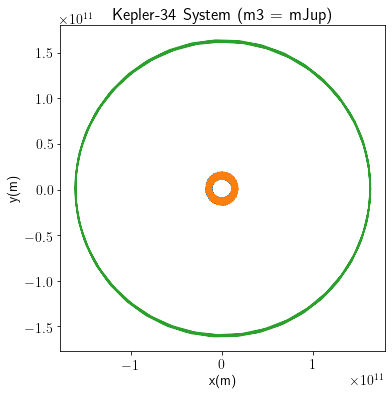

In [113]:
#Kepler-34 System with m3 = mJupiter and time increased
m1 = (1.0479  * u.Msun).decompose().value
m2 = (1.0208 * u.Msun).decompose().value
m3 = (1  * u.Mjup).decompose().value
mu = (m1*m2)/(m1+m2)
G = const.G.value
a = (0.22882 * u.AU).decompose().value
a3 = (1.0896 * u.AU).decompose().value

r1 = -a*(mu/m1)
r2 = a*(mu/m2)
r3 = a3

P = (27.795 * u.day).decompose().value
P3 = (288.822 * u.day).decompose().value

v1 = 2*np.pi*r1/P
v2 = 2*np.pi*r2/P
v3 = 2*np.pi*r3/P3

vect = np.array([r1, 0, 0, 0, v1, 0, r2, 0, 0, 0, v2, 0, r3, 0, 0, 0, v3, 0])
tarr = np.linspace(0,5*P3,200)

ans = integrate.odeint(threebodyfunc, vect, tarr)

x1, y1, z1 = ans[:,0], ans[:,1], ans[:,2]
vx1, vy1, vz1 = ans[:,3], ans[:,4], ans[:,5]

x2, y2, z2 = ans[:,6], ans[:,7], ans[:,8]
vx2, vy2, vz2 = ans[:,9], ans[:,10], ans[:,11]

x3, y3, z3 = ans[:,12], ans[:,13], ans[:,14]
vx3, vy3, vz3 = ans[:,15], ans[:,16], ans[:,17]

plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.title("Kepler-34 System (m3 = mJup)")
plt.xlabel('x(m)')
plt.ylabel('y(m)')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()


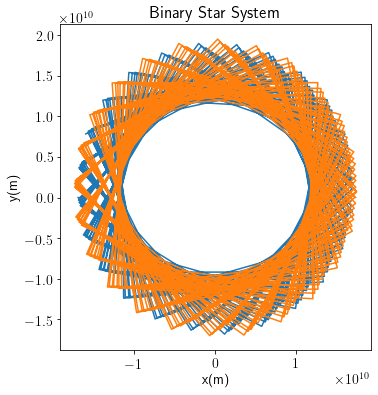

In [114]:
plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title('Binary Star System')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
#plt.title('Circular Orbit')
plt.gca().set_aspect('equal')
plt.show()

The orbits of both stars became more distorted, while the planet's orbit was only slightly distorted in the timeframe given.